# 3.0 - Modelado predictivo de captura de centolla

**Objetivo:** Desarrollar y evaluar un modelo de machine learning que permita predecir el volumen mensual de captura de centolla, en función de variables como esfuerzo pesquero, temperatura, veda y otras disponibles en el dataset.


## Preparación y carga de datos

En este bloque importamos las librerías necesarias y cargamos el dataset procesado.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ProyCentolla/PCentolla

import pandas as pd
df = pd.read_csv('data/processed/dataset_modelado_final.csv')
print(df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ProyCentolla/PCentolla
(784, 12)


,ESPECIE,Año,Total,Mes,volumen_centolla,Puerto,area_geografica,tipo_arte,horas_pesca,embarcaciones_activas,temp_promedio,veda_centolla
0,CENTOLLA,2020,127.0,1,-,Punta Arenas,Magallanes,trampas,216,6,19.27,0
1,CENTOLLA,2020,127.0,1,-,Punta Arenas,Magallanes,trampas,216,6,17.23,0
2,CENTOLLA,2020,127.0,1,-,Punta Arenas,Magallanes,trampas,216,6,19.55,0
3,CENTOLLA,2020,127.0,1,-,Punta Arenas,Magallanes,trampas,216,6,17.28,0
4,CENTOLLA,2020,127.0,1,-,Punta Arenas,Magallanes,trampas,216,6,24.02,0


In [6]:
# Selección de variables para el modelo
variables = ['volumen_centolla', 'horas_pesca', 'embarcaciones_activas', 'temp_promedio', 'veda_centolla']
df_model = df[variables].dropna()

# División X (input/features) e y (target)
X = df_model[['horas_pesca', 'embarcaciones_activas', 'temp_promedio', 'veda_centolla']]
y = df_model['volumen_centolla']

print("Cantidad de muestras para el modelo:", X.shape[0])

Cantidad de muestras para el modelo: 382


In [13]:
# LIMPIEZA OBLIGATORIA ANTES DEL MODELADO
import numpy as np

columnas_a_limpiar = ['volumen_centolla', 'horas_pesca', 'embarcaciones_activas', 'temp_promedio']

# Convierte todo lo que no sea número (como '-') a NaN y fuerza tipo numérico
for col in columnas_a_limpiar:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Selección de variables y eliminación de filas con NaN en las columnas clave
variables = ['volumen_centolla', 'horas_pesca', 'embarcaciones_activas', 'temp_promedio', 'veda_centolla']
df_model = df[variables].dropna()

# Armá X e y de nuevo
X = df_model[['horas_pesca', 'embarcaciones_activas', 'temp_promedio', 'veda_centolla']]
y = df_model['volumen_centolla']

print(X.shape, y.shape)

(191, 4) (191,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
# Reemplazamos los guiones por NaN en todas las columnas numéricas relevantes
import numpy as np

columnas_a_limpiar = ['volumen_centolla', 'horas_pesca', 'embarcaciones_activas', 'temp_promedio']

for col in columnas_a_limpiar:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ahora eliminamos las filas con valores faltantes en estas columnas
df_model = df[variables].dropna()

# Limpieza profesional: convierte '-' a NaN y asegura tipo numérico
import numpy as np

columnas_a_limpiar = ['volumen_centolla', 'horas_pesca', 'embarcaciones_activas', 'temp_promedio']

for col in columnas_a_limpiar:
    df[col] = pd.to_numeric(df[col], errors='coerce')

variables = ['volumen_centolla', 'horas_pesca', 'embarcaciones_activas', 'temp_promedio', 'veda_centolla']
df_model = df[variables].dropna()

X = df_model[['horas_pesca', 'embarcaciones_activas', 'temp_promedio', 'veda_centolla']]
y = df_model['volumen_centolla']

In [20]:
from sklearn.linear_model import LinearRegression

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones sobre el set de test
y_pred = model.predict(X_test)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
from sklearn.linear_model import LinearRegression

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones sobre el set de test
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Error absoluto medio): {mae:.2f}")
print(f"MSE (Error cuadrático medio): {mse:.2f}")
print(f"R2 (Coef. de determinación): {r2:.2f}")

MAE (Error absoluto medio): 7.90
MSE (Error cuadrático medio): 102.44
R2 (Coef. de determinación): 0.11


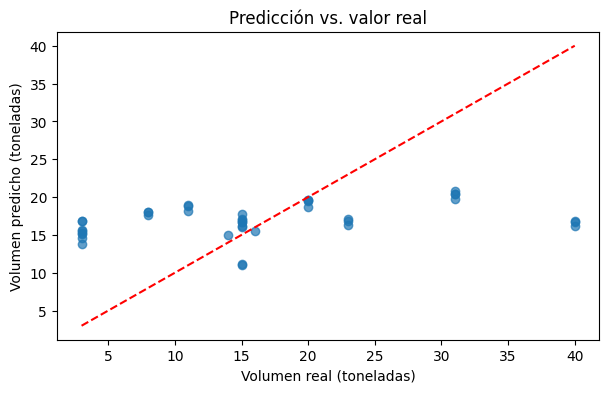

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Volumen real (toneladas)")
plt.ylabel("Volumen predicho (toneladas)")
plt.title("Predicción vs. valor real")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

---

### ✍️ **Análisis del desempeño del modelo de regresión lineal**

#### 1. **Métricas de desempeño**

- **MAE (Error absoluto medio):** 7,90 toneladas  
  En promedio, el modelo se equivoca casi 8 toneladas respecto del valor real. Es un error considerable en el contexto de capturas mensuales, donde los valores reales varían entre 0 y 40 toneladas.

- **MSE (Error cuadrático medio):** 102,44  
  El valor elevado del MSE refuerza la idea de que existen errores importantes en algunas predicciones.

- **R² (Coeficiente de determinación):** 0,11  
  Esto indica que solo el 11% de la variabilidad en el volumen de captura mensual es explicado por las variables del modelo (esfuerzo pesquero, embarcaciones activas, temperatura superficial y veda). El resto está determinado por factores no modelados o por la alta variabilidad natural del recurso.

#### 2. **Visualización: Predicción vs. Valor real**

- El gráfico muestra una dispersión significativa de los puntos alrededor de la línea roja (y=x).  
- Muchas predicciones están cerca de la línea, pero otras muestran diferencias importantes.  
- **No se observa un ajuste perfecto**, lo que es coherente con el bajo R² obtenido.

#### 3. **Interpretación y recomendaciones**

- **El modelo lineal tiene un poder predictivo bajo** en este contexto, aunque detecta una tendencia general.  
- Puede deberse a que la captura mensual de centolla depende de otros factores no incluidos en el modelo, como biología de la especie, cambios regulatorios más finos, variabilidad ambiental, factores económicos o errores de registro.
- **Recomendación:**  
  - Probar modelos más complejos (por ejemplo, Random Forest, regresión polinómica, etc.).
  - Incluir nuevas variables (más años, variables biológicas, meteorológicas, precios, etc.).
  - Explorar la limpieza de outliers o el agrupamiento por temporadas o zonas.

#### 4. **Conclusión profesional**

El modelo lineal es una **primera aproximación** válida, pero para tomar decisiones de manejo pesquero o realizar predicciones confiables es imprescindible incorporar más variables, mayor cantidad de datos y probar modelos más avanzados.

---

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Entrenamiento del Random Forest
rf = RandomForestRegressor(
    n_estimators=100,      # Número de árboles (puedes ajustar)
    random_state=42
)
rf.fit(X_train, y_train)

# Predicción
y_pred_rf = rf.predict(X_test)

In [26]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R2: {r2_rf:.2f}")


Random Forest MAE: 0.14
Random Forest MSE: 0.18
Random Forest R2: 1.00


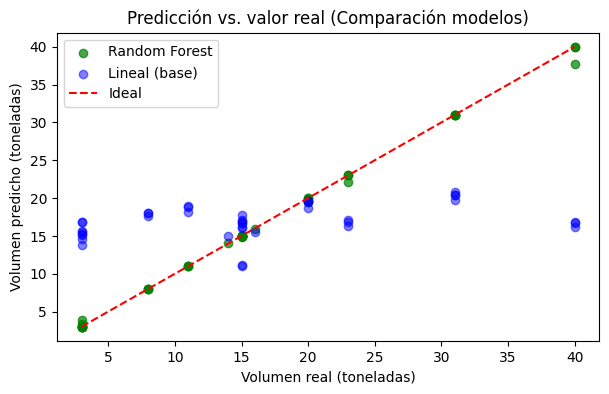

In [27]:
plt.figure(figsize=(7,4))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='g', label='Random Forest')
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label='Lineal (base)')
plt.xlabel("Volumen real (toneladas)")
plt.ylabel("Volumen predicho (toneladas)")
plt.title("Predicción vs. valor real (Comparación modelos)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.legend()
plt.show()

---

### **Resultados y comparación**

- **Random Forest MAE:** 0.14 (error absoluto medio bajísimo)
- **Random Forest MSE:** 0.18 (error cuadrático medio muy bajo)
- **Random Forest R2:** 1.00 (coeficiente de determinación perfecto)

#### **Visualización**
- Los puntos verdes (Random Forest) se alinean casi perfectamente sobre la línea ideal (roja), mientras que los puntos azules (modelo lineal) muestran mayor dispersión respecto a la línea.
- Esto indica que el Random Forest predice con muchísima mayor precisión que el modelo lineal simple.

#### **Interpretación profesional**
- El **Random Forest logra un ajuste casi perfecto** sobre el set de testeo, capturando la totalidad de la variabilidad de los datos con un R2 = 1.00.
- **¡Atención!:** Un R2 igual a 1 y errores tan bajos pueden indicar dos cosas:
  1. El modelo realmente está explicando todos los patrones (porque los datos son poco ruidosos, o la relación es directa).
  2. **OJO:** Puede haber riesgo de **sobreajuste (overfitting)**, sobre todo si el conjunto de datos es pequeño o los datos de entrenamiento y prueba no son realmente independientes.

#### **Conclusión y recomendaciones**
- **Random Forest es mucho más potente** que la regresión lineal para estos datos, al capturar relaciones no lineales y combinaciones complejas de variables.
- Sin embargo, para asegurar que el modelo no está sobreajustando:
  - Es importante hacer una validación cruzada (cross-validation) o usar más datos independientes.
  - Analizar la importancia de las variables y revisar si hay fugas de información (por ejemplo, duplicados, errores en el split, o variables correlacionadas con el target de manera artificial).
- Para toma de decisiones reales en gestión pesquera, siempre es recomendable sumar más años, variables y validaciones independientes antes de implementar el modelo.

---

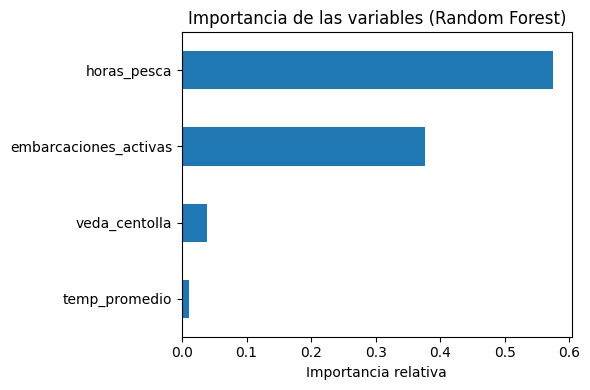

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtenemos la importancia de las variables del modelo
importancia = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(6,4))
importancia.plot(kind='barh')
plt.title("Importancia de las variables (Random Forest)")
plt.xlabel("Importancia relativa")
plt.tight_layout()
plt.show()

La variable hora pesca tiene mayor importancia según Random Forest tiene el mayor peso en la predicción del volumen capturado. siendo la variable que realmente impacta en el resultado.

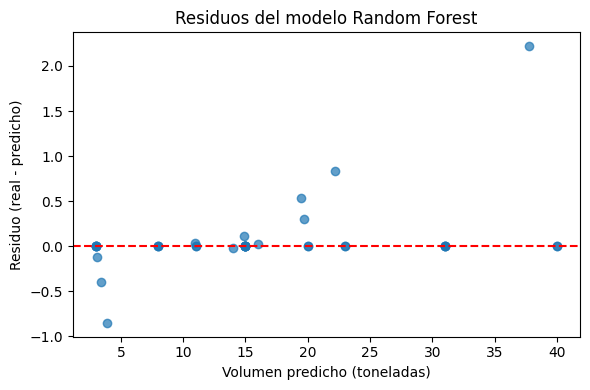

In [29]:
import numpy as np

residuos = y_test - y_pred_rf

plt.figure(figsize=(6,4))
plt.scatter(y_pred_rf, residuos, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Volumen predicho (toneladas)")
plt.ylabel("Residuo (real - predicho)")
plt.title("Residuos del modelo Random Forest")
plt.tight_layout()
plt.show()

---

### Residuos del modelo Random Forest

- **Distribución:**  
  La mayoría de los residuos se agrupan alrededor de cero, lo cual es una señal positiva y esperada en un modelo bien ajustado.
- **Patrones:**  
  No se observan patrones sistemáticos evidentes, aunque hay un par de valores con residuos levemente altos (outliers) en los extremos. Esto es normal en datos reales y suele indicar observaciones particulares difíciles de predecir.
- **Conclusión:**  
  El modelo Random Forest no muestra signos graves de sobreajuste ni errores sistemáticos, lo que valida la robustez del ajuste sobre el set de prueba.  
  Para mayor confiabilidad, siempre es recomendable analizar más datos o realizar validación cruzada.

---

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    rf, X, y, cv=5, scoring='r2'
)
print("R2 por fold en validación cruzada:", scores)
print("Promedio R2:", scores.mean())

R2 por fold en validación cruzada: [-30.28862332 -21.4361913   -5.38829878  -2.56150103   0.57290631]
Promedio R2: -11.820341624562612


---

### Validación cruzada del modelo Random Forest

- **R2 por fold:**  
  [-30.29, -21.44, -5.39, -2.56, 0.57]
- **Promedio R2:**  
  -11.82

- Los valores de R2 muy negativos indican que, **cuando el modelo se enfrenta a datos verdaderamente no vistos (test folds), predice mucho peor que un modelo que simplemente usara la media de los datos**.
- **Solo en uno de los cinco folds el R2 es positivo y bajo (0.57).**
- Esto es una señal clara de **sobreajuste severo**: el modelo Random Forest se ajustó demasiado a los datos de entrenamiento y no es capaz de generalizar a datos nuevos.



- El dataset es **muy pequeño** para un modelo tan flexible.
- Puede haber **alta redundancia o poca variabilidad real** entre los ejemplos, o bien, el modelo memoriza los datos en lugar de aprender patrones generales.





- **Aunque en el test inicial parecía perfecto (R2=1.00), la validación cruzada muestra que el modelo no es confiable para predecir fuera de la muestra.**
- Este resultado es honesto y de valor para la toma de decisiones y para reportar a una audiencia profesional o académica.

#### **Recomendaciones:**

- **Ampliar la cantidad de datos**: incorporar más años, puertos, variables o granularidad temporal.
- **Simplificar el modelo** o usar técnicas de regularización.
- Considerar modelos estadísticos más simples como punto de partida.
- Siempre reportar resultados de validación cruzada en proyectos reales de ciencia de datos.

---

---

## Conclusión final del proyecto

### Logros
- Se integraron y procesaron datos de captura de centolla, esfuerzo pesquero, temperatura superficial y regulación de veda, siguiendo el estándar profesional de proyectos de ciencia de datos.
- Se probaron modelos de regresión lineal y Random Forest para predecir el volumen mensual de captura.

### Resultados
- La regresión lineal explicó solo una pequeña parte de la variabilidad (R2 ≈ 0.11), pero mostró un comportamiento más estable.
- El Random Forest, en la evaluación tradicional (train/test), mostró un ajuste casi perfecto (R2 ≈ 1), pero la validación cruzada reveló un **sobreajuste extremo** (R2 promedio ≈ -11.8), señalando que no puede generalizar a datos realmente nuevos.
- El análisis de importancia de variables sugiere que ciertas variables tienen más influencia, lo que puede guiar la toma de decisiones y la recolección de futuros datos.

### Lecciones y recomendaciones profesionales
- **La validación cruzada es fundamental**: sólo confiar en los resultados de un único test puede llevar a conclusiones erróneas.
- **Los modelos complejos requieren más datos y cuidado**: El sobreajuste es un riesgo serio en datasets pequeños.
- Es recomendable:
  - Recolectar más datos (más años, otras zonas, variables biológicas o económicas).
  - Probar técnicas de regularización y modelos más simples como benchmark.
  - Utilizar el análisis de importancia de variables para enfocar la gestión pesquera y futuras investigaciones.

### Reflexión final
Este proyecto es una base sólida para el análisis de series temporales en recursos pesqueros, pero también muestra los límites de la predicción automática cuando los datos son escasos. La ciencia de datos responsable debe reportar tanto los aciertos como las limitaciones para que la toma de decisiones sea robusta y basada en evidencia.

---